## Notes
<div class="alert alert-block alert-info" style="margin-top: 20px">

1. Matplotlib architecture<br>
    A. Backend - Using the inline backend, we can modify a figure after it is rendered.<br>
    B. Artist<br>
    C. Scripting<br>
    
2. <span style='color:#61b15a'> Metabase </span> is a set of data that describes and gives information about other data.<br>

3. The main types stored in **_pandas_ objects** as below. In addition these dtypes have item sizes, e.g. int64 and int32. <br>
    A. _float_<br>
    B. _int_<br>
    C. _bool_<br>
    D. _datetime64[ns]_<br>
    E. _datetime64[ns, tz] (in >= 0.17.0)_<br>
    F. _timedelta[ns]_<br>
    G. _category (in >= 0.15.0)_<br>
    
4. `.loc[]`only look for string match<br>
    A. if _int/float_ need no **''**<br>
    B. if string need **''**<br>
    
5. **Column names** that are **integers** (such as the years) might introduce some confusion. For example,the year 2013, one might confuse that when the 2013th positional index.<br>
    >To avoid this ambuigity, let's **convert the column names into strings**: '1980' to '2013'.<br>
    
6. When passing multiple **conditions (Boolean Series)** to **filter data frame**<br>
    >When using 'and' and 'or' operators, pandas requires one **'&'** and **'|'** instead of **'and'** and **'or'**<br>
    >Enclose the conditions in **seperate parentheses**<br>
    
7. Refer to _pandas_ API reference here [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html), and _Matplotlib_ here [Matplotlib library](https://matplotlib.org/?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)<br>
    
8. Line Plot (Series/Dataframe)<br>
    > is a type of plot which displays information as a **series of data points** called **'markers'** connected by **straight line segments**.<br>
    >>Use line plot for **continuous data set**. These are best suited for **trend-based visualizations** of data over a period of time.<br>
    
9. For data processing (in **data frame**) better to have the index and **column tittle** as **_string_**<br>
    >For **plotting** purpose, better to have **axis title** as **_int / float_**<br>
    
10. _pandas_ plot index as x-axis and column as y - axis
    > `x-axis` is the independent variable - years<br>
     `y-axis` is the dependent variable - immigrants
    </div>
    <hr>


## 1. _pandas_ basics

In [108]:
import pandas as pd
import numpy as np

In [109]:
filename = r'C:\Users\tingy\OneDrive\Python 3\Coursera\Data Visualization\Canada.xlsx'

In [110]:
df = pd.read_excel(filename, sheet_name='Canada by Citizenship', skiprows=range(20))
# First 20 rows is an image

>`skiprows=` will read a **list** as input

In [111]:
df.tail(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,...,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,...,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


> **Note: last two rows are irrelevant information - can be deleted**

In [112]:
df.index

RangeIndex(start=0, stop=197, step=1)

In [113]:
df.drop(df.tail(2).index, inplace=True)

>`label` can be single or list-like

In [114]:
# Summary of new data frame
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 67.0+ KB


>`verbosa=False` means need no print full summary

In [115]:
# size of dataframe (rows, columns)
df.shape 

(195, 43)

In [116]:
df.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [117]:
# two ways to extract columns as array / list

print(type(df.columns.to_list()))
print(type(df.columns.values))

<class 'list'>
<class 'numpy.ndarray'>


In [118]:
# two ways to extract index as list / array

print(type(df.index.to_list()))
print(type(df.index.values))

<class 'list'>
<class 'numpy.ndarray'>


In [119]:
# remove unnecessary columns 

df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


> `axis=1` means iterate by **columns** while `axis=0` iterate by **rows**<br>
`inplace` means the data frame will be modified and updated 

In [120]:
#rename the columns 
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [121]:
df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [122]:
# total immagrant in year 1980
df[1980].sum(axis=0)

99137

In [123]:
# total immagrants in year 1980 to 2013
df[df.columns.values[4:]].sum(axis=0)

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

In [124]:
# Albania's total immigrants over the entire period 1980 - 2013
df.loc[df['Country'] == 'Albania'].sum(axis=1)

1    15699
dtype: int64

In [125]:
# All countries' total immigrants over the entire period 1980 - 2013
df['Total'] = df.sum(axis=1)
df['Total']

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Name: Total, Length: 195, dtype: int64

>`['Total']` column is added to the dataframe

In [126]:
# Nan in the data frame
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [127]:
# Stats summary
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


> 75 % means 75% of data have the value less that what's stated in the table below and so does %50 and &25

## 2. Locating
> `df.loc[label]`: filters by the **labels** of the index/column<br>
  `df.iloc[index]`: filters by the **positions** of the index/column
>> **TRICK**: set the **column** as the index using `set_index()`

#### 2.1 Method one (Easy) - `loc[]` +  `set_index()`

In [128]:
df.set_index('Country', inplace=True)

>- Dataframe can be reset to original index by using `reset_index()`<br>

In [129]:
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


>- `df.index.name` is the index name: **Country**, it can be removed by line `df.index.name = None`

In [130]:
df.loc[['Japan']]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [131]:
# value in 2013
df.loc['Japan', 2013]

982

> column label - 2013 is an int type

In [132]:
# value from 1980 to 1984
df.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object

In [133]:
# value from 1980 to 1984 in data frame
df.loc[['Japan']].filter(items=[1980, 1981, 1982, 1983, 1984, 1984])

,1980,1981,1982,1983,1984,1984
Country,,,,,,
Japan,701,756,598,309,246,246


#### 2.2 Method two - `iloc[]`

In [134]:
# find index where 'Japan' is
for  index,name in enumerate(df.index):
    if name == 'Japan':
        print(index)

87


In [135]:
df.iloc[[87]]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [136]:
# value in 2013 - two methods
print (df.iloc[87,-2])
print (df.iloc[87,36])

982
982


> **cell** (is a **_int_** in this dataframe) at ` position index=87` and `position column= -2 / 36`

In [137]:
# value from 19890 to 1984
df.iloc[87, [3, 4, 5, 6, 7, 8]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

In [138]:
df.iloc[[87]].filter(items=[1980, 1981, 1982, 1983, 1984, 1984])

,1980,1981,1982,1983,1984,1984
Country,,,,,,
Japan,701,756,598,309,246,246


## 3. Filter dataframe with conditions

In [139]:
# created the condition boolean series
# let's filter to show the data on Asian countries (Continent = Asia)
condition = df['Continent'] == 'Asia'
print(condition)

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [140]:
df[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [141]:
# can pass mutliple criteria in the same line. 
#let's filter for Continent = Asia and Region = Southern Asia

df[(df['Continent'] == 'Asia') & (df['Region'] == 'Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


## 4. Data Visualization with Matplotlib
Since we converted the years to string, let's **declare a variable** that will allow us to easily call upon the full range of years - **'1980': '2013'**

In [142]:
df.columns = list(map(str, df.columns))

In [143]:
df.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')

In [145]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

 Use `map()` to convert **column headers** into strings: '1980' to '2013'
 >`map(func, *iterables)` --> map objectd

In [146]:
# inline backend
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

>`matplotlib.pyplot` **function** makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels
>In this lab, the **scripting layer** will be used to generate **line plots**

In [147]:
mpl.__version__ #>= 2.0.0

'3.3.4'

## Case study

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


First, we will extract the data series for Haiti.

In [148]:
haiti = df.loc['Haiti', years]
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

In [149]:
type(haiti)

pandas.core.series.Series

In [150]:
haiti.index #object type

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [151]:
# let's change the index values of Haiti to type integer for plotting
haiti.index = haiti.index.map(int) 

In [152]:
haiti.index #int64 type after mapping

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

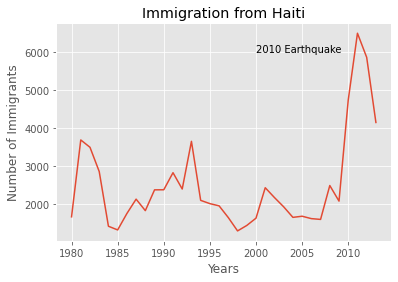

In [154]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.text(2000, 6000, '2010 Earthquake')

plt.show() # need this line to show the updates made to the figure

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.
- Remember the data frame has set the 'Country' as the index

In [155]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Step 1: Get the data set for China and India, and display dataframe.

In [156]:
df_CI = df.loc[['China', 'India'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

<AxesSubplot:xlabel='Country'>

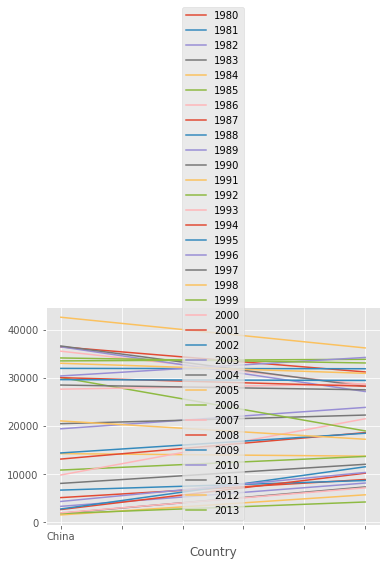

In [157]:
df_CI.plot(kind='line')

That doesn't look right...

Recall that _pandas_ plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.


In [158]:
df_CI = df_CI.transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [159]:
df_CI.index = df_CI.index.map(int)

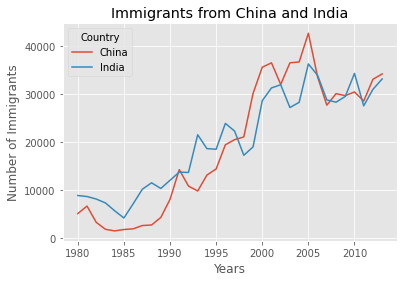

In [160]:
df_CI.plot()

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()